<a href="https://colab.research.google.com/github/360abhi/AngularHostListener/blob/main/verbs1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import string
from collections import defaultdict
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

## UTIL FUNCTIONS

def remove_punctuation(sentence):
    translator = str.maketrans('', '', string.punctuation)
    return sentence.translate(translator)


def remove_stopwords(sentences):
    stop_words = set(stopwords.words('english'))
    filtered_sentences = []
    for sentence in sentences:
        words = word_tokenize(sentence)
        filtered_sentence = [word for word in words if word.lower() not in stop_words]
        filtered_sentences.append(' '.join(filtered_sentence))
    return filtered_sentences

def remove_stop_words_and_single_chars(word_list):
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in word_list if word not in stop_words and len(word) > 1]

    return filtered_words


def remove_duplicates(sentences):
    unique_sentences = list(set(sentences))
    return unique_sentences


def remove_specific_words(word_list, words_to_remove):
    removal_set = set(words_to_remove)
    filtered_words = [word for word in word_list if word not in removal_set]

    return filtered_words


def convert_to_individual_words(sentences):
    words = []
    for sentence in sentences:
        words.extend(word_tokenize(sentence))
    return words


def word_frequencies(words):
    frequency = defaultdict(int)
    for word in words:
        frequency[word.lower()] += 1
    return dict(frequency)


In [53]:
## ACTION VERBS

import spacy
import re

nlp = spacy.load("en_core_web_sm")

pre_def_verbs = ['click','submit','review','edit','enter','view','check','access','select','authorize']

def extract_action_verbs(sentence):
    try:
      doc = nlp(sentence)
      action_verbs = []

      rootToken = next(token for token in doc if token.dep_ == "ROOT")

      for index,token in enumerate(doc):

              if token.dep_ == "ROOT":

                  # Check if ROOT and does not have xcomp children

                  if not any(child.dep_ in ["ccomp","xcomp","pcomp"] for child in token.children):

                    if token.pos_ == "VERB":
                      action_verbs.append(token.text)
                      if token.text.lower() not in pre_def_verbs:
                        pre_def_verbs.append(token.text.lower())

                  # If ROOT and has xcomp children, skip ROOT but consider xcomp

                  else:

                      for child in token.children:

                          if child.dep_ in ["ccomp","pcomp","xcomp"] and child.pos_ == "VERB":
                              action_verbs.append(child.text)
                              if child.text.lower() not in pre_def_verbs:
                                pre_def_verbs.append(child.text.lower())

              elif token.dep_ in ["xcomp","ccomp","pcomp"]:

                # print("Insidexcomp", token.text)
                try:

                  if token.head.text != rootToken.text:
                    if token.pos_ == "VERB":
                      action_verbs.append(token.text)
                      if token.text.lower() not in pre_def_verbs:
                        pre_def_verbs.append(token.text.lower())

                except:
                  pass

              elif token.dep_ == "conj":

                  # Check if conj has xcomp children and the child is a verb

                  if any(child.dep_ in ["xcomp","pcomp","ccomp"] and child.pos_ == "VERB" for child in token.children):

                      for child in token.children:

                          if child.dep_ in ["xcomp","pcomp","ccomp"] and child.pos_ == "VERB":
                              action_verbs.append(child.text)
                              if child.text.lower() not in pre_def_verbs:
                                pre_def_verbs.append(child.text.lower())

                  # If conj itself is a verb and has no xcomp children, append conj



                  elif token.pos_ == "VERB":
                      action_verbs.append(token.text)
                      if token.text.lower() not in pre_def_verbs:
                        pre_def_verbs.append(token.text.lower())

    except Exception as e:
      print(str(e))
      return []

    return action_verbs

In [93]:
# DATA PRE PROCESSING
import pandas as pd
import json
import ast

df = pd.read_csv('TESTCASES.csv')

# step_summary_rows = df['DATA'][1:100]
step_summary_rows = df['DATA'][1:100]

global_action_list = []

for row in step_summary_rows:
  result = ast.literal_eval(row)
  for step in result['STEP_SUMMARY']:
    step = remove_punctuation(step)
    action_verbs = extract_action_verbs(step)
    global_action_list.extend(action_verbs)


# Filtering Unique Verbs

global_action_list = list(set(action.lower() for action in global_action_list))

print(global_action_list)





['enter', 'remove', 'tab', 'search', 'check', 'add', 'validate', 'click', 'charge', 'navigate', 'select', 'modify', 'create', 'expired', 'selecting', 'login']


In [94]:
print(len(global_action_list))

16


In [98]:
## COMBINING ALL LISTS AND TAKING UNIQUE STEPS

step_summary_rows = df['DATA'][1:100]
combined_list = []

for row in step_summary_rows:

    # Converting into lowercase and removing punctuations
    result = ast.literal_eval(row)
    result = result['STEP_SUMMARY']
    lowercase_sentences = [
        sentence.lower().translate(str.maketrans('', '', string.punctuation)).replace('\n', ' ')
        for sentence in result
    ]
    combined_list.extend(lowercase_sentences)

# print(combined_list)
print(len(combined_list))

# Removing duplicates
combined_list = remove_duplicates(combined_list)

print(len(combined_list))
# print(combined_list)

# Convert into single list of all words
word_list = convert_to_individual_words(combined_list)

# Remove stop words and action_verbs
word_list = remove_stop_words_and_single_chars(word_list)
# print(len(word_list))
# print(word_list)

# Remove action verbs
word_list = remove_specific_words(word_list, global_action_list)
print(len(word_list))
# print(word_list)





849
71
448


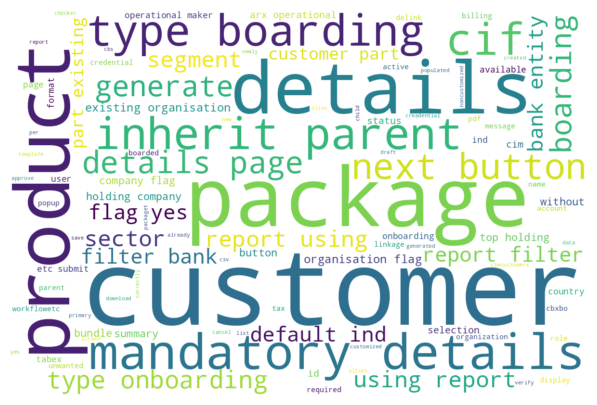

{'customer': 28, 'details': 28, 'report': 19, 'type': 15, 'boarding': 15, 'package': 13, 'button': 13, 'flag': 11, 'page': 11, 'onboarding': 10, 'parent': 10, 'mandatory': 10, 'ind': 9, 'cif': 8, 'inherit': 8, 'next': 8, 'product': 8, 'yes': 7, 'generate': 7, 'using': 6, 'filter': 6, 'bank': 6, 'entity': 6, 'default': 6, 'segment': 6, 'sector': 6, 'part': 6, 'existing': 6, 'organisation': 6, 'without': 5, 'summary': 5, 'top': 5, 'holding': 5, 'company': 5, 'bundle': 5, 'cim': 4, 'arx': 4, 'operational': 4, 'status': 4, 'id': 4, 'available': 3, 'maker': 3, 'country': 3, 'user': 3, 'format': 3, 'tabex': 3, 'products': 3, 'etc': 3, 'submit': 3, 'selection': 3, 'boarded': 2, 'delink': 2, 'popup': 2, 'message': 2, 'display': 2, 'cbxbo': 2, 'role': 2, 'workflowetc': 2, 'credential': 2, 'account': 2, 'linkage': 2, 'pdf': 2, 'active': 2, 'organization': 2, 'name': 2, 'required': 2, 'unwanted': 2, 'billing': 2, 'tax': 2, 'already': 1, 'cimcustomers': 1, 'checker': 1, 'cbs': 1, 'creadential': 1,

In [99]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

def generate_word_cloud(word_list):
    text = ' '.join(word_list)
    wordcloud = WordCloud(width=1200, height=800, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

word_list = word_list
generate_word_cloud(word_list)

def count_and_sort_words(word_list):
    word_counts = Counter(word_list)
    sorted_word_counts = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True))

    return sorted_word_counts

sorted_word_counts = count_and_sort_words(word_list)
print(sorted_word_counts)
